<a href="https://colab.research.google.com/github/FranciscoAguiar/DataScienceProgramming/blob/master/UEA_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise descritiva dos dados sobre doentes cardíacos e não cardíacos


**Autores:**

Francisco de Assis Marinho Aguiar

Julio Cesar Horta Pereira

Juliana Ferreguette Sena 

Leandro Da Cruz Farias

**Fonte:** https://www.kaggle.com/sulianova/cardiovascular-disease-dataset?select=cardio_train.csv

## Bibliotecas

In [ ]:
from scipy.stats import binom, nbinom, poisson, uniform, expon, norm, t, ttest_1samp, ttest_ind, chi2_contingency
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import statistics as st
import pandas as pd
from scipy import stats

## Banco de dados

In [ ]:
!ls

sample_data


In [ ]:
cardiodb = pd.read_csv('sample_data/cardio_train.csv',sep=';')

In [ ]:
cardiodb

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
cardiodb.info

<bound method DataFrame.info of           id    age  gender  height  weight  ...  gluc  smoke  alco  active  cardio
0          0  18393       2     168    62.0  ...     1      0     0       1       0
1          1  20228       1     156    85.0  ...     1      0     0       1       1
2          2  18857       1     165    64.0  ...     1      0     0       0       1
3          3  17623       2     169    82.0  ...     1      0     0       1       1
4          4  17474       1     156    56.0  ...     1      0     0       0       0
...      ...    ...     ...     ...     ...  ...   ...    ...   ...     ...     ...
69995  99993  19240       2     168    76.0  ...     1      1     0       1       0
69996  99995  22601       1     158   126.0  ...     2      0     0       1       1
69997  99996  19066       2     183   105.0  ...     1      0     1       0       1
69998  99998  22431       1     163    72.0  ...     2      0     0       0       1
69999  99999  20540       1     170    72.0 

Features : 

Age    | int (days)

Height | int (cm) |

Weight | float (kg) |

Gender | categorical code | 1 - women, 2 - men

ap_hi | Systolic blood pressure   |  int |

ap_lo | Diastolic blood pressure  |  int |

Cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | 1: normal, 2: above normal, 3: well above normal |

Smoking  | binary |

Alcohol intake | binary |

Physical activity | binary |

Presence or absence of cardiovascular disease  | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

# Análise

## Exibição das variáveis

In [ ]:
cardiodb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
data = cardiodb[['id', 'age']]
df = pd.DataFrame(data)
df.columns

Index(['id', 'age'], dtype='object')

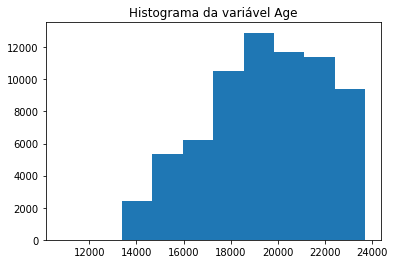

In [ ]:
plt.hist(df['age'])
plt.title("Histograma da variável Age")
plt.show() 

gender
1         45530
2         24470
dtype: int64


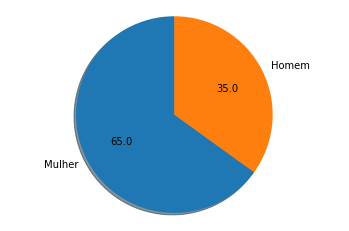

In [ ]:
labels = 'Mulher', 'Homem'
genderdb = cardiodb.value_counts(['gender'])
print(genderdb)
#1 - women, 2 - men
genderdb.to_list()
women = genderdb.to_list()[0]
men = genderdb.to_list()[1]
sizes = [women, men]
fig1, ax1 = plt.subplots();
ax1.pie(sizes, labels=labels, autopct='%1.1f', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

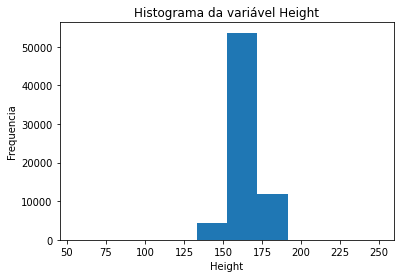

In [ ]:
data = cardiodb[['id', 'height']]
df = pd.DataFrame(data)
df.columns
plt.hist(df['height'])
plt.title("Histograma da variável Height")
plt.xlabel("Height")
plt.ylabel("Frequencia")
plt.show() 

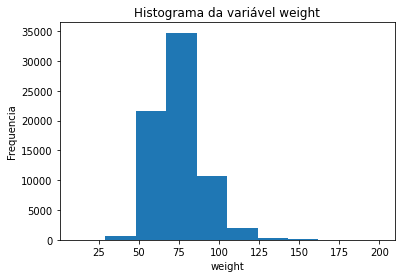

In [ ]:
data = cardiodb[['id', 'weight']]
df = pd.DataFrame(data)
df.columns
plt.hist(df['weight'])
plt.title("Histograma da variável weight")
plt.xlabel("weight")
plt.ylabel("Frequencia")
plt.show() 

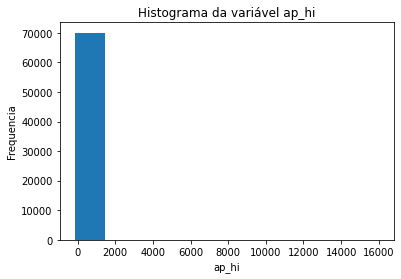

In [ ]:
data = cardiodb[['id', 'ap_hi']]
df = pd.DataFrame(data)
df.columns
plt.hist(df['ap_hi'])
plt.title("Histograma da variável ap_hi")
plt.xlabel("ap_hi")
plt.ylabel("Frequencia")
plt.show() 

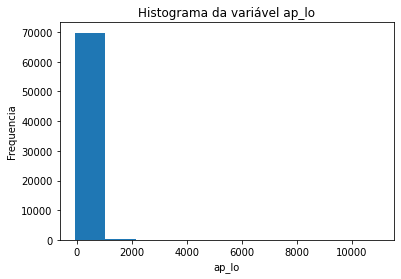

In [ ]:
data = cardiodb[['id', 'ap_lo']]
df = pd.DataFrame(data)
df.columns
plt.hist(df['ap_lo'])
plt.title("Histograma da variável ap_lo")
plt.xlabel("ap_lo")
plt.ylabel("Frequencia")
plt.show() 

cholesterol
1              52385
2               9549
3               8066
dtype: int64


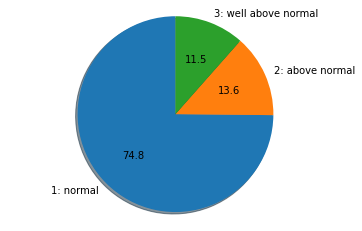

In [ ]:
labels = '1: normal','2: above normal', '3: well above normal'
cholesteroldb = cardiodb.value_counts(['cholesterol'])
print(cholesteroldb)
cholesteroldb.to_list()
normal = cholesteroldb.to_list()[0]
above = cholesteroldb.to_list()[1]
wellAbove = cholesteroldb.to_list()[2]
sizes = [normal, above, wellAbove]
fig1, ax1 = plt.subplots();
ax1.pie(sizes, labels=labels, autopct='%1.1f', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

gluc
1       59479
3        5331
2        5190
dtype: int64


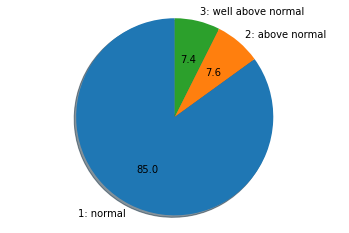

In [ ]:
labels = '1: normal','2: above normal', '3: well above normal'
glucosedb = cardiodb.value_counts(['gluc'])
print(glucosedb)
glucosedb.to_list()
normal = glucosedb.to_list()[0]
above = glucosedb.to_list()[1]
wellAbove = glucosedb.to_list()[2]
sizes = [normal, above, wellAbove]
fig1, ax1 = plt.subplots();
ax1.pie(sizes, labels=labels, autopct='%1.1f', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

smoke
0        63831
1         6169
dtype: int64


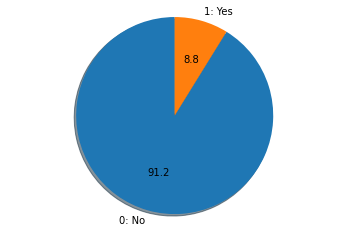

In [ ]:
#smoke

labels = '0: No','1: Yes'
smokedb = cardiodb.value_counts(['smoke'])
print(smokedb)
smokedb.to_list()
no = smokedb.to_list()[0]
yes = smokedb.to_list()[1]

sizes = [no, yes]
fig1, ax1 = plt.subplots();
ax1.pie(sizes, labels=labels, autopct='%1.1f', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

alco
0       66236
1        3764
dtype: int64


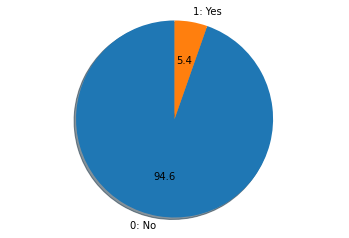

In [ ]:
#Alcohol intake - Ingestão de Alcool
labels = '0: No','1: Yes'
alcoholdb = cardiodb.value_counts(['alco'])
print(alcoholdb)
alcoholdb.to_list()
no = alcoholdb.to_list()[0]
yes = alcoholdb.to_list()[1]

sizes = [no, yes]
fig1, ax1 = plt.subplots();
ax1.pie(sizes, labels=labels, autopct='%1.1f', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

active
1         56261
0         13739
dtype: int64


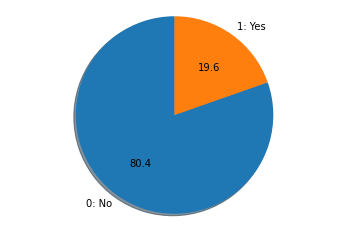

In [ ]:
#active
labels = '0: No','1: Yes'
activedb = cardiodb.value_counts(['active'])
print(activedb)
activedb.to_list()
no = activedb.to_list()[0]
yes = activedb.to_list()[1]

sizes = [no, yes]
fig1, ax1 = plt.subplots();
ax1.pie(sizes, labels=labels, autopct='%1.1f', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

cardio
0         35021
1         34979
dtype: int64


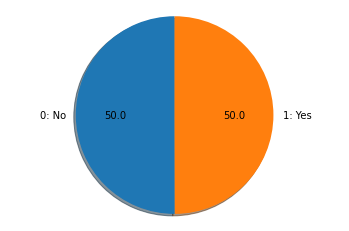

In [ ]:
#cardio
labels = '0: No','1: Yes'
cardioTargetDb = cardiodb.value_counts(['cardio'])
print(cardioTargetDb)
cardioTargetDb.to_list()
no = cardioTargetDb.to_list()[0]
yes = cardioTargetDb.to_list()[1]

sizes = [no, yes]
fig1, ax1 = plt.subplots();
ax1.pie(sizes, labels=labels, autopct='%1.1f', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

## Análise dos campos numéricos

In [ ]:
def get_coefficient_variation(df):
  return round(100 * df.std() / df.mean(), 2)

def show_distribution(df):
  sbn.displot(df, kind='kde')
  plt.title('Distribuição')
  plt.show()

def show_boxplot(df):
  sbn.boxplot(x=df)
  plt.title('Box plot')
  plt.show()

### Idade

**Média em anos**

In [ ]:
year_age = cardiodb.age // 365
round(year_age.mean(), 2)

52.84

**Mediana**

In [ ]:
year_age.median()

53.0

**Moda**

In [ ]:
year_age.mode()

0    55
dtype: int64

**Desvio-padrão**

In [ ]:
round(year_age.std(), 2)

6.77

**Coeficiente de variação**

In [ ]:
get_coefficient_variation(year_age)

12.81

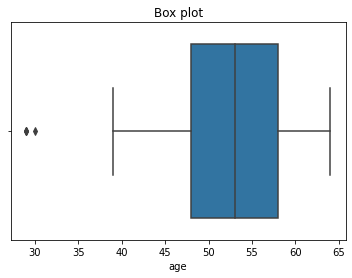

In [ ]:
show_boxplot(year_age)

Distribuição assimétrica negativa com presença de outliers.

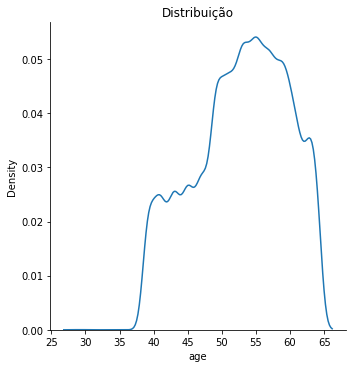

In [ ]:
show_distribution(year_age)

### Altura

**Média**

In [ ]:
round(cardiodb.height.mean(), 2)

164.36

**Mediana**

In [ ]:
cardiodb.height.median()

165.0

**Moda**

In [ ]:
cardiodb.height.mode()

0    165
dtype: int64

**Desvio-padrão**

In [ ]:
round(cardiodb.height.std(), 2)

8.21

**Coeficiente de variação**

In [ ]:
get_coefficient_variation(cardiodb.height)

5.0

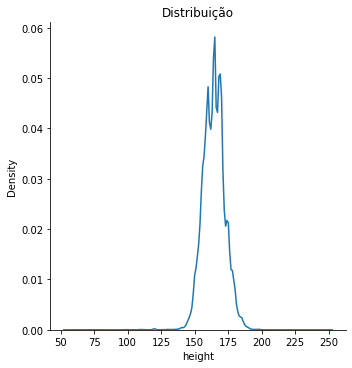

In [ ]:
show_distribution(cardiodb.height)

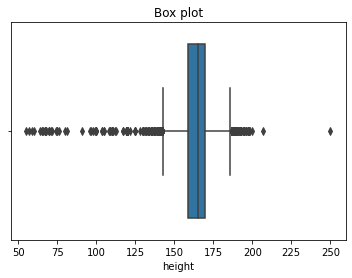

In [ ]:
show_boxplot(cardiodb.height)

Distribuição assimétrica negativa com presença de outliers.

### Peso

**Média**

In [ ]:
round(cardiodb.weight.mean(), 2)

74.21

**Mediana**

In [ ]:
cardiodb.weight.median()

72.0

**Moda**

In [ ]:
cardiodb.weight.mode()

0    65.0
dtype: float64

**Desvio-padrão**

In [ ]:
round(cardiodb.weight.std(), 2)

14.4

**Coeficiente de variação**

In [ ]:
get_coefficient_variation(cardiodb.weight)

19.4

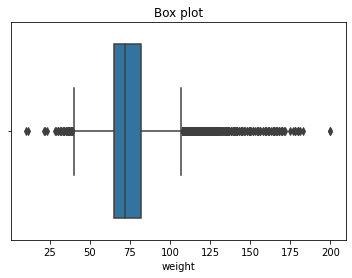

In [ ]:
show_boxplot(cardiodb.weight)

Distribuição assimétrica positiva com presença de outliers.

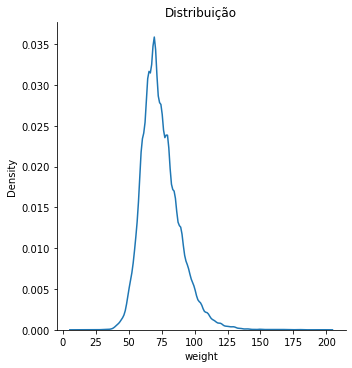

In [ ]:
show_distribution(cardiodb.weight)

### Sístole

**Média**

In [ ]:
round(cardiodb.ap_hi.mean(), 2)

128.82

**Mediana**

In [ ]:
cardiodb.ap_hi.median()

120.0

**Moda**

In [ ]:
cardiodb.ap_hi.mode()

0    120
dtype: int64

**Desvio-padrão**

In [ ]:
round(cardiodb.ap_hi.std(), 2)

154.01

**Coeficiente de variação**

In [ ]:
get_coefficient_variation(cardiodb.ap_hi)

119.56

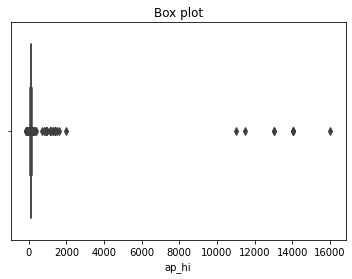

In [ ]:
show_boxplot(cardiodb.ap_hi)

Distribuição assimétrica positiva com presença de outliers.

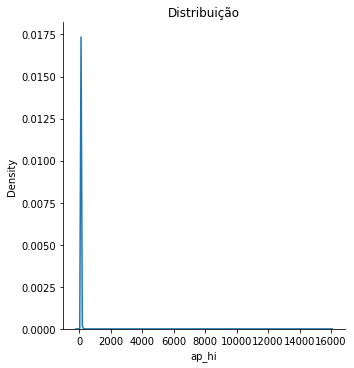

In [ ]:
show_distribution(cardiodb.ap_hi)

### Diástole

**Média**

In [ ]:
round(cardiodb.ap_lo.mean(), 2)

96.63

**Mediana**

In [ ]:
cardiodb.ap_lo.median()

80.0

**Moda**

In [ ]:
cardiodb.ap_lo.mode()

0    80
dtype: int64

**Desvio-padrão**

In [ ]:
round(cardiodb.ap_lo.std(), 2)

188.47

**Coeficiente de variação**

In [ ]:
get_coefficient_variation(cardiodb.ap_lo)

195.04

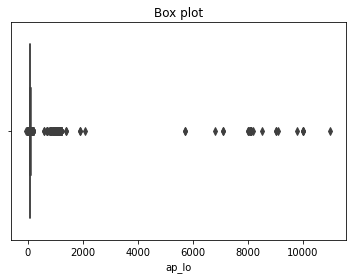

In [ ]:
show_boxplot(cardiodb.ap_lo)

Distribuição assimétrica positiva com presença de outliers.

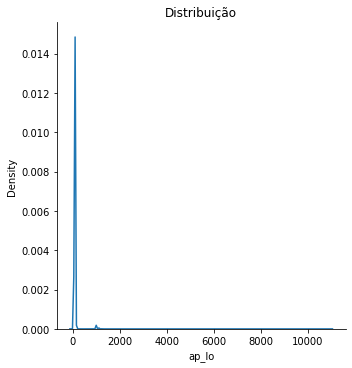

In [ ]:
show_distribution(cardiodb.ap_lo)

### Homogeneidade

Entre os campos numéricos, a **altura** apresenta mais homogeneidade por ter coeficiente de variação igual a 5%, o menor entre eles.

## Intervalos de confiança

d) (Vale 1,0 ponto) Calcular os respectivos Intervalos de Confiança ao nível de 95% para cada campo do data frame; Av. + ou - 1,96*sigma/raiz(n) (z(a/2)=1,96 para a=5%)

In [ ]:
def get_confidence_interval(df):
  df_size = df.size
  bottom, higher = t.interval(0.95, df_size-1, loc=df.mean(), scale=df.std()/np.sqrt(df_size))
  return bottom, higher

### Idade

**Limite inferior (95%)**

In [ ]:
bottom_age, higher_age = get_confidence_interval(year_age)
round(bottom_age, 2)

52.79

**Limite superior (95%)**

In [ ]:
round(higher_age, 2)

52.89

### Altura

**Limite inferior (95%)**

In [ ]:
bottom_height, higher_height = get_confidence_interval(cardiodb.height)
round(bottom_height, 2)

164.3

**Limite superior (95%)**

In [ ]:
round(higher_height, 2)

164.42

### Peso

**Limite inferior (95%)**

In [ ]:
bottom_weight, higher_weight = get_confidence_interval(cardiodb.weight)
round(bottom_weight, 2)

74.1

**Limite superior (95%)**

In [ ]:
round(higher_weight, 2)

74.31

### Sístole

**Limite inferior (95%)**

In [ ]:
bottom_ap_hi, higher_ap_hi = get_confidence_interval(cardiodb.ap_hi)
round(bottom_ap_hi, 2)

127.68

**Limite superior (95%)**

In [ ]:
round(higher_ap_hi, 2)

129.96

### Diástole

**Limite inferior (95%)**

In [ ]:
bottom_ap_lo, higher_ap_lo = get_confidence_interval(cardiodb.ap_lo)
round(bottom_ap_lo, 2)

95.23

**Limite superior (95%)**

In [ ]:
round(higher_ap_lo, 2)

98.03

## Comparação da média do campo numérico peso em relação a um campo categórico cardíaco

In [ ]:
no_cardio_df = cardiodb.loc[cardiodb.cardio == 0]
cardio_df = cardiodb.loc[cardiodb.cardio == 1]
print("Saudável:", no_cardio_df.shape)
print("Doente:", cardio_df.shape)

Saudável: (35021, 13)
Doente: (34979, 13)


In [ ]:
alfa=0.05

print("Média do peso dos saudáveis =", round(no_cardio_df.weight.mean(), 2))
print("Desvio-padrão do peso dos saudáveis =", round(no_cardio_df.weight.std(), 2))

print("\nMédia do peso dos doentes =", round(cardio_df.weight.mean(), 2))
print("Desvio-padrão do peso dos doentes =", round(cardio_df.weight.std(), 2))

t,p = ttest_ind(no_cardio_df.weight, cardio_df.weight)
print('\nt = %0.3f, p = %0.3f' % (t, p))
if p > alfa:
   print ("\nConclusão: aceita-se Ho, ou seja, as médias são estatisticamente iguais ao nível de significância de 5%.")
else:
   print ("\nConclusão: rejeita-se Ho, ou seja, as médias são estatisticamente diferentes ao nível de significância de 5%.")

Média do peso dos saudáveis = 71.59
Desvio-padrão do peso dos saudáveis = 13.31

Média do peso dos doentes = 76.82
Desvio-padrão do peso dos doentes = 14.96

t = -48.875, p = 0.000

Conclusão: rejeita-se Ho, ou seja, as médias são estatisticamente diferentes ao nível de significância de 5%.


## Cruzamento do campo categórico fumante e o campo categórico cardíaco

In [ ]:
contigence_df = pd.crosstab(cardiodb.cardio, cardiodb.smoke) 
contigence_df

smoke,0,1
cardio,,
0,31781,3240
1,32050,2929


In [ ]:
qui, p, gl, esperado = chi2_contingency(contigence_df, correction=False)
print("Valores esperados:")
print(esperado)
print('\nqui = %.3f, p = %.3f\n' % (qui, p))
if p > 0.05:
	print('Conclusão: as variáveis são independentes. São estatisticamente iguais ao nível de significância de 5%.')
else:
	print('Conclusão: as variáveis são dependentes. São estatisticamente diferentes ao nível de significância de 5%.')

Valores esperados:
[[31934.6493  3086.3507]
 [31896.3507  3082.6493]]

qui = 16.787, p = 0.000

Conclusão: as variáveis são dependentes. São estatisticamente diferentes ao nível de significância de 5%.


# Perguntas

# Coleta dos Dados

# Pré Processamento

# Exploração dos Dados